In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture 8: The Data Science Workflow, Logistic Regression

## 11/10/19

### Table of Contents
1. [Kaggle and Final Project Setup](#kaggle)
2. [The Data Science Workflow](#workflow) 
3. [The Question](#the-question)
4. [Data Loading](#data-loading)  
5. [Exploratory Data Analysis (EDA)](#eda)
6. [Data Cleaning and Feature Engineering](#feature-engineering)
7. [Model Creation and Logistic Regression](#model)   
8. [Model Evaluation](#evaluate)
9. [Model Selection](#select)
10. [References/Resources](#ref)

### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Authored by [Rosa Choe](mailto:rosachoe@berkeley.edu) and [Ajay Raj](mailto@araj@berkeley.edu).

<a id='kaggle'></a>

# Kaggle and Final Project Setup
Kaggle is an online platform that hosts machine learning and data analysis competitions. Anyone can create a private Kaggle competition, but there are a lot of public Kaggle competitions hosted by companies, many of which have monetary prizes! Generally the goal of a Kaggle competition is to make a model that accurately predicts a value or classifies data into categories. Participants are given a training dataset with features and labels, as well as an unlabeled test set that will be used to evaluate your final model.

Over the next few weeks, you will be participating in a Kaggle competition, learning new skills each week to help improve your models! Open up the starter code for the project and let's get setup! 


<a id='workflow'></a>

# The Data Science Workflow: Titanic

Although not a hard and fast rule, there is a rough guideline for how you should approach solving data science problems. We'll go through each of these steps in more detail during this lecture, but this is a brief overview for what the datascience workflow looks like:


<figure>
    <img src="workflow.png" width="400">
    <figcaption style='text-align: center'>From <a href='https://resources.github.com/downloads/development-workflows-data-scientists.pdf'>Development Workflows for Data Scientists</a></figcaption>
</figure>



There's a lot of data available online, and if you have a question you want to answer with data analysis, you will likely be able to find a free dataset online. As mentioned already, Kaggle is a great resource for data, since many companies will make their data publicly available so that data scientists around the world can help them answer questions of their own. 

<span id="the-question"></span>

## The Question

**Can we predict whether a passenger aboard the Titanic survived or not based on demographic features and features of where they were on the boat?**

<span id="data-loading"></span>

## Data Loading

In [2]:
titanic_train = pd.read_csv('titanic/train.csv')
titanic_test = pd.read_csv('titanic/test.csv')

How was the data created? *From 887 passengers aboard the Titanic*

What is the granularity of the data set (what does each row represent)? *Each row is a passenger aboard the ship*

What is the target variable? *Survived*

<a id='eda'></a>

## Exploratory Data Analysis (EDA)

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Let's look at the columns we have:

In [5]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The first column is **PassengerId**, which is just a numbering of the passengers and a **primary key**, or single identifier of a row of the table. It won't help us determine if each passenger survived. What we can do, change our **index** so that we use this field instead. Why? This makes more sense: the index should be able to uniquely define each passenger aboard.

In [6]:
titanic_train = titanic_train.set_index('PassengerId')
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The next column is **Survived**, which is our target variable. Since this is what we're trying to predict, let's leave it aside for now.

In [7]:
titanic_survived = titanic_train['Survived']
titanic_train = titanic_train.drop('Survived', axis=1)

In [8]:
titanic_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The next column is called **Pclass**. We're not really sure what that means, so let's investigate!

In [9]:
titanic_train['Pclass'].unique() # gets all possible values in this column

array(['Third', 'First', 'Second'], dtype=object)

When you have an historical dataset, you can figure out what columns mean with a little research. [Here](https://www.kaggle.com/c/titanic/data) is a description of all of the columns. **Pclass** is the passenger class (like first-class on a flight).

Let's now examine how passenger class relates to survival.

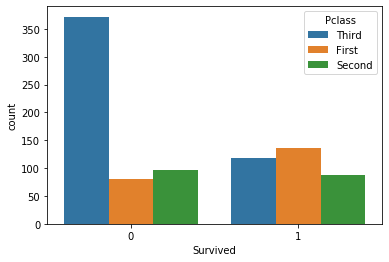

In [10]:
sns.countplot(x=titanic_survived, hue=titanic_train['Pclass']);

That's pretty telling. Third class passengers died aboard the Titanic disproportionately. We should probably use **Pclass** in our model.

The next column is the **Name** of each passenger. This is very tough to analyze because it is textual data, but we'll try anyway.

In [11]:
titanic_train['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

Perhaps there is significance in the people who have second names (in parentheses).


In [12]:
contains_par = titanic_train['Name'].str.contains('\(')

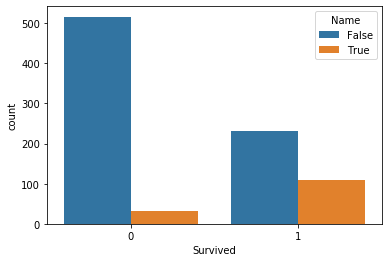

In [13]:
sns.countplot(x=titanic_survived, hue=contains_par);

There seems to be a bit significance here! Those who had a parenthesis in their name where more likely to survive.

The next column is the **Sex** of the passenger, which is pretty simple to analyze.

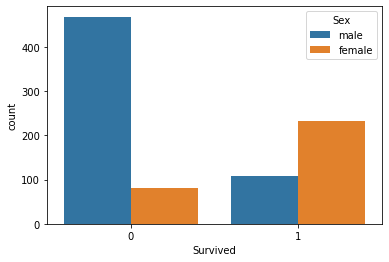

In [14]:
sns.countplot(x=titanic_survived, hue=titanic_train['Sex']);

Females survived at a much higher rate than males aboard the Titanic.

The next column is the **Age** of the passenger, which is different than the **categorical** variables we've been dealing previously.

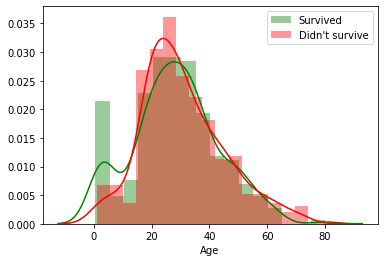

In [15]:
# Why did we include the ~pd.isnull?
train_survived_age = titanic_train[titanic_survived == 1]['Age']
train_no_survived_age = titanic_train[titanic_survived == 0]['Age']

sns.distplot(train_survived_age[~pd.isnull(train_survived_age)], label="Survived", color="green");
sns.distplot(train_no_survived_age[~pd.isnull(train_no_survived_age)], label="Didn't survive", color="red");
plt.legend();

This is a little tough to look at, so let's add a vertical line with the means of the two distributions.

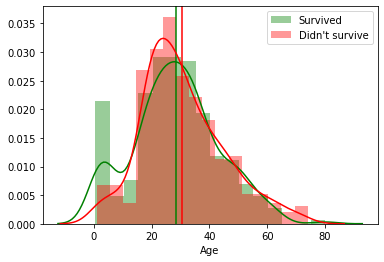

In [16]:
plt.axvline(train_survived_age.mean(), 0, 1, color="green")
sns.distplot(train_survived_age[~pd.isnull(train_survived_age)], label="Survived", color="green");
sns.distplot(train_no_survived_age[~pd.isnull(train_no_survived_age)], label="Didn't survive", color="red");
plt.axvline(train_no_survived_age.mean(), 0, 1, color="red")
plt.legend();

So although the distributions of ages look different based on survival, the means are pretty close, so maybe age isn't a great predictor.

The next column is called **SibSp**—currently we have no idea what that means. Let's investigate!

In [17]:
titanic_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

Researching a [little bit](https://www.kaggle.com/c/titanic/data), we find that **SibSp** is the number of siblings / spouses aboard the ship. This looks promising! Maybe if passengers weren't alone, they were able to survive more often. Let's analyze this similarly to Age.

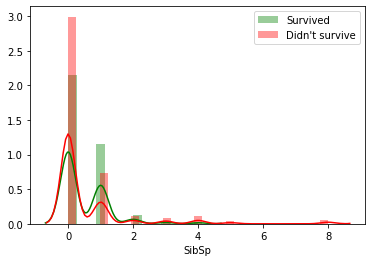

In [18]:
train_survived_sibsp = titanic_train[titanic_survived == 1]['SibSp']
train_no_survived_sibsp = titanic_train[titanic_survived == 0]['SibSp']

sns.distplot(train_survived_sibsp[~pd.isnull(train_survived_sibsp)], label="Survived", color="green");
sns.distplot(train_no_survived_sibsp[~pd.isnull(train_no_survived_sibsp)], label="Didn't survive", color="red");
plt.legend();

This plot is incorrigible, and provides no help whatsoever. The problem is that this variable should really be treated as a **categorical variable**: the number of siblings is less relevant than how each "type of family" fared against the iceberg.

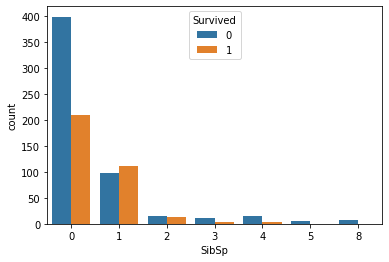

In [19]:
sns.countplot(x=titanic_train['SibSp'], hue=titanic_survived);

This is a little more telling! Our hypothesis that people that alone died alone (SAD!) more than those in families was correct. This looks like a pretty good predictor.

In general, it's important to try different visualizations when doing EDA! Don't give up on a predictor if your initial analysis isn't promising.

The next column is called **Parch**—again, we have no idea from the name alone.

In [20]:
titanic_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

[We find](https://www.kaggle.com/c/titanic/data) that this column is the # of parents / children aboard the Titanic. This is a measure very similar to **SibSp** but the relationship is different. Maybe the same relationship to survival holds?

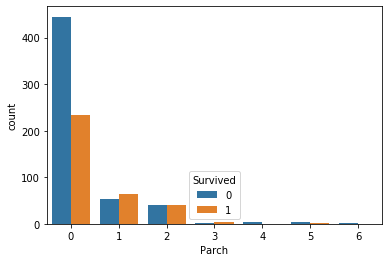

In [21]:
sns.countplot(x=titanic_train['Parch'], hue=titanic_survived);

As expected, **SibSp** and **Parch** are pretty correlated. We should probably either choose only one for our model or combine them in some way.

In [22]:
r = np.corrcoef(titanic_train['Parch'], titanic_train['SibSp'])[0, 1]
r

0.4148376986201556

The next column is **Ticket**, which seems to be the ticket number of each passenger.

In [23]:
titanic_train['Ticket'].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

As we can see, some values have certain prefixes. Let's group them into two categories: having a special ticket and not, and looking at the effect on survival.

In [24]:
is_normal_ticket = titanic_train['Ticket'].apply(lambda s: s.isdigit())

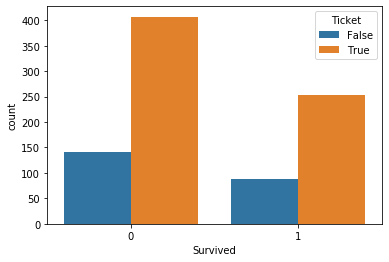

In [25]:
sns.countplot(x=titanic_survived, hue=is_normal_ticket);

Although it's not by much, those with fancy tickets seem to die at a higher rate. Maybe this isn't the best predictor.

The next column is the **Fare** paid by each passenger, which looks fully numerical. Let's analyze this in the same way we analyzed **Age**.

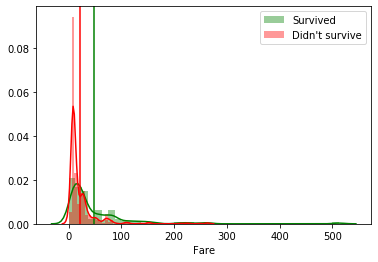

In [26]:
train_survived_fare = titanic_train[titanic_survived == 1]['Fare']
train_no_survived_fare = titanic_train[titanic_survived == 0]['Fare']

plt.axvline(train_survived_fare.mean(), 0, 1, color="green")
sns.distplot(train_survived_fare, label="Survived", color="green");
sns.distplot(train_no_survived_fare, label="Didn't survive", color="red");
plt.axvline(train_no_survived_fare.mean(), 0, 1, color="red")
plt.legend();

This graph is impossible to read! Looking at the difference of the two vertical lines (the means), there is certainly a significant difference in the mean fare price if the passenger survived or not. Let's try to log transform the data.

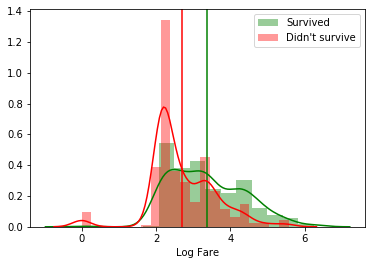

In [27]:
train_survived_fare = titanic_train[titanic_survived == 1]['Fare']
train_no_survived_fare = titanic_train[titanic_survived == 0]['Fare']

train_survived_fare_log = np.log(train_survived_fare + 1) # why do we add 1?
train_no_survived_fare_log = np.log(train_no_survived_fare + 1)

plt.axvline(train_survived_fare_log.mean(), 0, 1, color="green")
sns.distplot(train_survived_fare_log, label="Survived", color="green");
sns.distplot(train_no_survived_fare_log, label="Didn't survive", color="red");
plt.axvline(train_no_survived_fare_log.mean(), 0, 1, color="red")
plt.xlabel('Log Fare')
plt.legend();

As we can see, passengers that didn't survive paid much less for their ticket than passengers who survived.

The next column is the **Cabin** number of the passenger. This is also tough to analyze alone.

In [28]:
titanic_train['Cabin'].head() # what does NaN mean?

PassengerId
1     NaN
2     C85
3     NaN
4    C123
5     NaN
Name: Cabin, dtype: object

Let's look at the first 5 non-null values instead.

In [29]:
titanic_train['Cabin'][~pd.isnull(titanic_train['Cabin'])].head()

PassengerId
2      C85
4     C123
7      E46
11      G6
12    C103
Name: Cabin, dtype: object

There is probably significance in the letter that precedes the number (maybe the deck of the ship that the cabin is).

In [30]:
decks = titanic_train['Cabin'].apply(lambda s: s[0] if s is not np.nan else 'NO-DECK')
# we want to also capture those who didn't have a cabin in our column, so we assign it to a value as well
decks.value_counts()

NO-DECK    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Cabin, dtype: int64

Here's a picture of the Titanic ship.

<img src='cabin.png' style='width: 300px'></img>

There isn't a "T" deck, so that was probably an error. Let's leave this out of our graph (this will be important later in the model!)

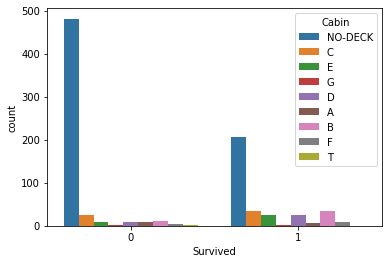

In [31]:
sns.countplot(x=titanic_survived, hue=decks);

We can see that those without a cabin survived at a much lower rate than other cabins, but we can't really see the other decks.

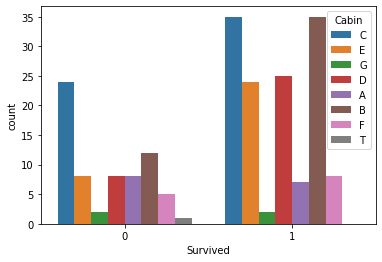

In [32]:
sns.countplot(x=titanic_survived[decks != 'NO-DECK'], hue=decks[decks != 'NO-DECK']);

The last column is **Embarked**, which is the port that each passenger embarked from. From the [Kaggle competition](https://www.kaggle.com/c/titanic/data), `C = Cherbourg, Q = Queenstown, S = Southampton`.

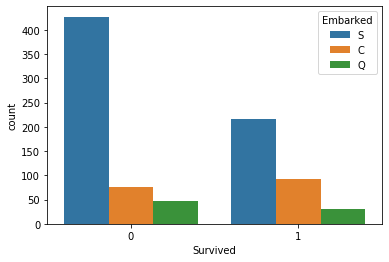

In [33]:
sns.countplot(x=titanic_survived, hue=titanic_train['Embarked']);

Those who embarked from Southampton were the most disproportionately affected!

**Exploratory data analysis** is one of the most important parts of the data science process. What we've shown above should only be subset of the analysis that is actually done. Understanding the context of the data and features of the data is exceedingly more important that figuring out the best "model".

<span id="feature-engineering"></span>
## Data Cleaning and Feature Engineering

The goal of feature engineering is to take your dataset and turn it into a set of **numerical features** for a model to be trained and evaluated on. 

An important part of **feature engineering** is **data cleaning**, where in creating the features for the model, we make sure that we make sure we have no null values in our final DataFrame, and don't train our model on unusual points.

A common technique in **feature engineering** is to *concatenate the train and the test* data matrices (removing the target variable from the train first). 

Why is this a good idea? *When you transform your train DataFrame and train your model, you won't be able to predict on the test set without the test DataFrame being transformed in the same way.*

In [34]:
full_data = pd.concat((titanic_train, titanic_test), sort=False)

### Removing Nulls

Let's see where the `NaN`s are. We can count how many `NaN`s are in each column using the `pd.isnull()` and `sum()` functions. We're basically converting every value in the dataframe to `True` and `False` values based on whether they are `NaN`, and summing across columns. 

In [35]:
pd.isnull(titanic_train).sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Dang! `Cabin` has a lot of missing values. There are only 891 values in the `titanic_train` dataframe, and a majority of them are missing. With missing values we have a couple options. The first is *dropping features*.

#### Option 1: Dropping Features

We might think "hey, if most of the values don't have a value for `cabin`, we should probably just get rid of this column". If we want to do that, we could just drop a column in the following way:

In [36]:
titanic_dropped_col = titanic_train.drop('Cabin', axis=1)
titanic_dropped_col.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Easy! However, what if we lost some valuable information by dropping that column? We'll go into more Exploratory Data Analysis (EDA) later, but there are some small exploratory steps we can take to inform our data cleaning. For example, just for fun, let's take a look at the survival rates between passengers that had a value for `Cabin` and passengers that did not.

In [37]:
titanic_survived[~titanic_train['Cabin'].isna()].mean()

0.6666666666666666

In [38]:
titanic_survived[titanic_train['Cabin'].isna()].mean()

0.29985443959243085

Wow, that is a non-trivial difference! This is an example of when `NaN` can provide information instead of just being extraneous information. For now, let's keep the `Cabin` column.

#### Option 2: Drop Rows

Another column with a good number of missing values is `Age`, with `177` of `891` being missing. We *could* drop the column, but our knowledge of history might remind us that "women and children" were prioritized, so age could provide valuable information. Alternatively, we can drop rows with missing values for features we think are important. We can do this in a very similar way to dropping columns:

In [39]:
titanic_dropped_rows = titanic_train.dropna(axis=0, subset=['Age'])
print(titanic_dropped_rows.isna().sum())
print(titanic_dropped_rows.shape, titanic_train.shape)

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       529
Embarked      2
dtype: int64
(714, 10) (891, 10)


Now we don't have any `NaN` values in `Age` and we kept all of the original features, but we have fewer rows than we did before! We're missing out on the other features of the rows that we removed!

#### Option 3: Impute Values

It's always better to have more data to train on, so we are losing some information by dropping columns. How can we keep all of the observations in our training data while also getting rid of `NaN`s? We can try to *impute* or guess what the values should be based on the present values. How you impute depends on your data. 

For example, for `Age`, we might want to fill in the `NaN` values with the average age. We can do this using the `fillna()` function.

In [40]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())

We've managed to remove the `NaN` values, without reducing the number of observations in our training set! However, clearly this method won't work on `Cabin` and `Embarked`, because these are categorical variables with no concept of average.

Let's take a look at `Embarked`, which describes the location where a passenger boarded the ship.

In [41]:
titanic_train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In this case, we could impute the `NaN` values by assigning the most common location that passengers boarded from. If over 70% of the passengers boarded from Southampton, it is likely that the 2 missing values also boarded at Southampton.

In [42]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna(titanic_train['Embarked'].value_counts().idxmax())
titanic_train['Embarked'].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Once again, we've managed to remove the missing values without reducing the our training size!

### Unusual Values

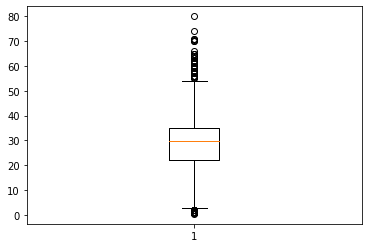

In [43]:
from matplotlib import pyplot as plt

plt.boxplot(titanic_train['Age']);

In the boxplot, the circles represent outliers, which are defined as values that are greater than `1.5 x IQR` away from the 1st and 3rd quartiles. The `IQR`, or interquartile range, is defined as `Q3 - Q1`, or the difference between the 75th percentile (3rd quartile) and the 25th percentile (1st quartile) of values. We can remove outliers by calculating the `IQR` and finding the values which lie within the range `[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]`

(825, 10)


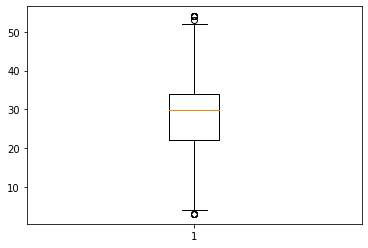

In [44]:
q1 = titanic_train['Age'].quantile(.25)
q3 = titanic_train['Age'].quantile(.75)
iqr = q3 - q1

within_range = (q1 - 1.5*iqr <= titanic_train['Age']) & (titanic_train['Age'] <= q3 + 1.5*iqr)

titanic_outiers_removed = titanic_train[within_range]
print(titanic_outiers_removed.shape)
plt.boxplot(titanic_outiers_removed['Age']);

You may have noticed that there are still outliers in the boxplot. These are actually new ones that weren't considered outliers before. Because we removed some data points, we've changed the quartile values, and thus changed the range of values considered outliers. This is called *masking*, because the outliers that existed before were so extreme they made the IQR large and *masked* other values that could also be considered outliers.

<a id='categorical'></a>
### Categorical Variables / String Processing

Let's revisit the categorical variables we explored in the EDA step. We need to somehow convert these values into numerical values.

#### Ordered Categorical Variables

Let's look at `Pclass`. This is a categorical variable, but there is a clear ordering to the possible values for `Pclass`, since there's a direct translation from `First -> 1`, `Second -> 2`, and `Third -> 3`. 

#### One-Hot Encoding
We cleaned the categorical variables earlier, but they're still non-numeric, and for our models, we need to make all of our data numeric. To convert categorical variables to numeric values, we can use a method called *one-hot encoding*. Basically, we will make a new column for each category and set a flag of 1 or 0 – 1 if that observation is in that category, and 0 if it's not.

We basically want to achieve something that looks like this:

<img src='one_hot_1.png' style='width: 500px'></img>

How do we do that? Luckily, pandas has a built-in function called `get_dummies()` that will do the one-hot encoding for us! *One-hot encoding is also called dummy encoding*.


In [45]:
pd.get_dummies(titanic_train, columns=['Embarked']).head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
2,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
3,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
4,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
5,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


We can also do this for `Sex` and `Cabin`. We could do it separately, but the columns argument takes in a list of column names, so we can do this all at once.

In [46]:
titanic_train = pd.get_dummies(titanic_train, columns=['Embarked', 'Sex', 'Cabin'])
titanic_train.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,Third,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Third,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Third,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Preprocessing Function

It's good to keep all of your transformations in one function to keep your code organized.

In [47]:
def feature_engineering(df):
    df = df.drop(['Name', 'PassengerId', 'Age', 'Ticket'], axis=1)
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax()) # fill with Southampton
    df['Deck'] = df['Cabin'].apply(lambda s: s[0] if s is not np.nan else 'U') # U for unassigned
    df['Fare'] = np.log(df['Fare'] + 1)
    df = df.drop('Cabin', axis=1)
    df = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Sex', 'Deck'])
    
    df = df.drop('Deck_T', axis=1)
    
    return df
    

In [48]:
full_data_cleaned = feature_engineering(full_data)

In [49]:
full_data_cleaned.head()

,SibSp,Parch,Fare,Pclass_First,Pclass_Second,Pclass_Third,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U
1,1,0,2.110213,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
2,1,0,4.280593,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,2.188856,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
4,1,0,3.990834,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
5,0,0,2.202765,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [50]:
titanic_train_cleaned = full_data_cleaned.iloc[:titanic_train.shape[0]]
titanic_test_cleaned = full_data_cleaned.iloc[titanic_train.shape[0]:]

<a id='model'></a>

## Model Creation and Logistic Regression

We saw a few weeks back that linear regression can perform classification by transforming the output using the **logistic function** and changing the loss from RSS (residual sum of squares) to **cross-entropy loss**.

Let $\sigma(x) = \frac{1}{1 + e^{-x}}$ be the logistic function. Then, $\hat{y} = \sigma(X \beta)$, where $\beta$ are our regression coefficients. We use **cross-entropy loss** instead of normal least squares loss.

$$\mathcal{L}_{\text{OLS}}(y_i, \hat{y_i}) = (y_i - \hat{y_i})^2$$
$$\mathcal{L}_{\text{CE}}(y_i, \hat{y_i}) = -(y_i \ln \hat{y_i} + (1 - y_i) \ln (1 - \hat{y_i}))$$

So, our regression optimization problem is:

$$\min_{\beta} \sum_{i = 1}^n \mathcal{L}_{\text{CE}}(y_i, \sigma(x_i^T \beta))$$

Contrast this with our old regression optimization problem:

$$\min_{\beta} \sum_{i = 1}^n \mathcal{L}_{\text{OLS}}(y_i, x_i^T \beta)$$

We saw that there is no closed form solution to this new **logistic regression** problem that there is for linear regression because it isn't possible to set the derivative equal to zero and solve for $\beta$. We instead use gradient descent:

$$\beta^{(t+1)} \gets \beta^{(t)} - \alpha \nabla_{\beta} \left(\sum_{i = 1}^n \mathcal{L}_{\text{CE}}(y_i, \sigma(x_i^T \beta^{(t)}))\right)$$

$\alpha$ is our **learning rate**, which is the step-size that we're taking on our loss.

It turns out this gradient looks really nice:

$$\nabla_{\beta} \left(\sum_{i = 1}^n \mathcal{L}_{\text{CE}}(y_i, \sigma(x_i^T \beta^{(t)}))\right) = -X^T (y - \sigma(X \beta^{(t)}))$$

So, our gradient update is:

$$\beta^{(t+1)} \gets \beta^{(t)} + \alpha X^T (y - \sigma(X \beta^{(t)}))$$

**Regularization:** We can also introduce the same concept of ridge regression by adding a regularizer to our objective.

$$\min_{\beta} \sum_{i = 1}^n \mathcal{L}_{\text{CE}}(y_i, \sigma(x_i^T \beta)) + \lambda \cdot \frac{1}{2}\sum_{i = 1}^n \beta_i^2$$

Our gradient update becomes:

$$\beta^{(t+1)} \gets \beta^{(t)} + \alpha (X^T (y - \sigma(X \beta^{(t)})) - \lambda \beta^{(t)})$$

In [51]:
np.random.seed(42)

In [52]:
def accuracy(y_pred, y_true, threshold):
    y_pred[y_pred < threshold] = 0
    y_pred[y_pred > threshold] = 1
    return (y_pred == y_true).sum() / y_pred.shape[0]

def cross_entropy_loss(y_pred, y_true):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).sum()

In [53]:
def logistic_regression(X, y, lamb, alpha, iterations=10000, plot=False):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def predict(X, beta):
        return sigmoid(X @ beta)

    def gradient(X_i, y_i, beta, lamb):
        return -X.T @ (y - predict(X, beta)) + lamb * beta

    def update(X, y, beta, lamb, alpha):
        return beta - alpha * gradient(X, y, beta, lamb)
    
    def loss(X, y, beta):
        y_hat = predict(X, beta)
        return cross_entropy_loss(y_hat, y)
    
    X = np.hstack((np.ones((X.shape[0],1)), X))
    beta = np.random.normal(size=X.shape[1])
    
    acc = np.zeros(iterations)
    losses = np.zeros(iterations)
    
    for i in range(iterations):
        preds = predict(X, beta)
        acc[i] = accuracy(preds, y, 0.5)
        losses[i] = loss(X, y, beta)
        beta = update(X, y, beta, lamb, alpha)
        
    if plot:
        fig, ax = plt.subplots(1, 2, figsize=(15.0,4.8))

        ax[0].plot(np.arange(iterations), acc)
        ax[0].set_title("Accuracy")

        ax[1].plot(np.arange(iterations), losses)
        ax[1].set_title("Loss")
    
    return beta, acc, losses, lambda X: predict(np.hstack((np.ones((X.shape[0],1)), X)), beta)

In [54]:
X = titanic_train_cleaned.values
y = titanic_survived.values

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
beta, acc, losses, predict = logistic_regression(X_train, y_train, lamb=2.0, alpha=0.001, iterations=500)

In [57]:
accuracy(predict(X_valid), y_valid, 0.5)

0.770949720670391

<span id="evaluate"></span>

## Model Evaluation

We now have a logistic regression model, but we have a hyperparameter, $\lambda$. How do we decide on the optimal choice of $\lambda$?

The answer is **cross-validation**, which we went over last week, but first, we need to figure out how to evaluate our performance.

We'll evaluate our performance for $\lambda = [1, 2, 3]$

In [58]:
beta1, acc1, losses1, predict1 = logistic_regression(X_train, y_train, lamb=1.0, alpha=0.001, iterations=500)

In [59]:
beta2, acc2, losses2, predict2 = logistic_regression(X_train, y_train, lamb=2.0, alpha=0.001, iterations=500)

In [60]:
beta3, acc3, losses3, predict3 = logistic_regression(X_train, y_train, lamb=3.0, alpha=0.001, iterations=500)

<a id='mse'></a>
### Loss

We can look at our cross-entropy loss (what we're actually training our model on).

In [61]:
cross_entropy_loss(predict1(X_valid), y_valid)

82.43184201134376

In [62]:
cross_entropy_loss(predict2(X_valid), y_valid)

81.67025917806978

In [63]:
cross_entropy_loss(predict3(X_valid), y_valid)

81.34869017964526

<a id='accuracy'></a>
### Accuracy

Accuracy represents the percent of values that were correctly predicted.

In [64]:
accuracy(predict1(X_valid), y_valid, threshold=0.5)

0.770949720670391

In [65]:
accuracy(predict2(X_valid), y_valid, threshold=0.5)

0.776536312849162

In [66]:
accuracy(predict3(X_valid), y_valid, threshold=0.5) # what does threshold mean?

0.7653631284916201

### ROC Curve

In [67]:
from sklearn.metrics import roc_curve, auc

def roc(probs, y_true):
    fpr, tpr, threshold = roc_curve(y_valid, probs)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

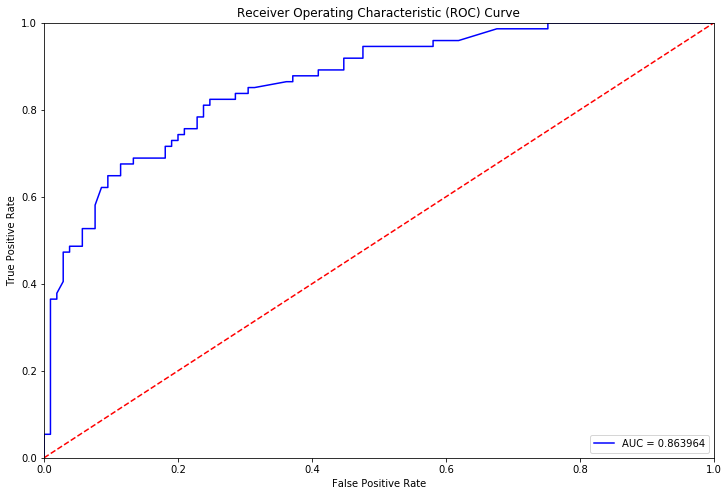

In [68]:
roc(predict1(X_valid), y_valid)

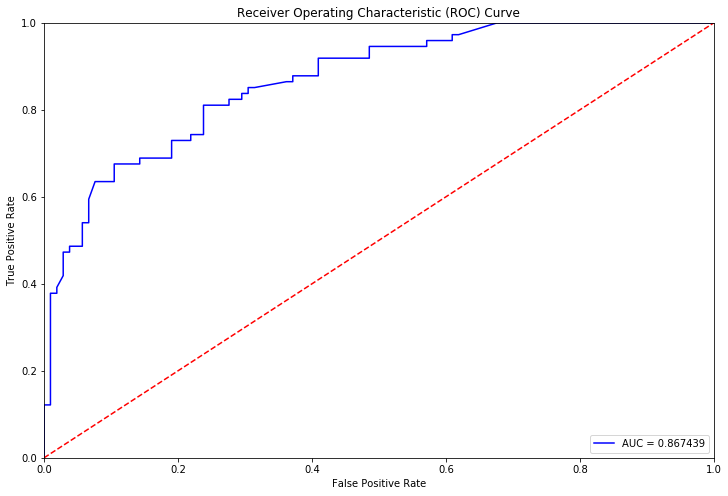

In [69]:
roc(predict2(X_valid), y_valid)

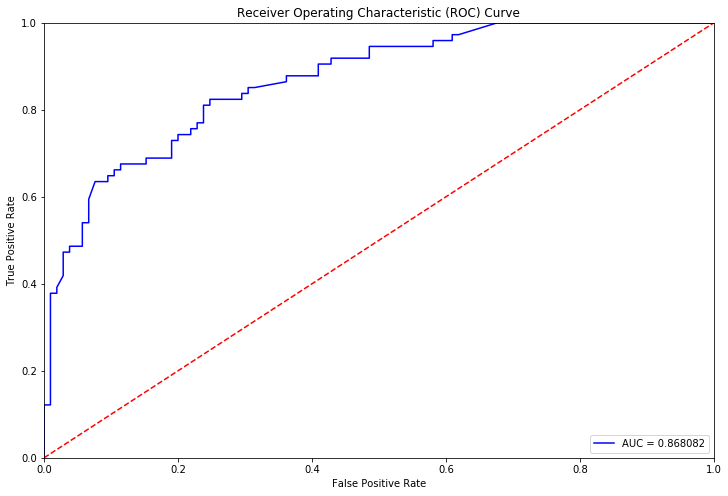

In [70]:
roc(predict3(X_valid), y_valid)

<a id='select'></a>
## Model Selection

Based on a variety of factors, we choose our model. For today, we'll just use $\lambda = 2$ with `threshold = 0.05`.

In [71]:
probs = predict2(titanic_test_cleaned.values)
probs[np.isnan(probs)] = 0 # something went wrong with our model! we predicted nan. investigate this on your own
preds = probs
preds[probs > 0.5] = 1
preds[probs < 0.5] = 0

In [72]:
preds

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

We can use the script below to save our predictions to a `csv` file to submit to Kaggle! Your results will be saved to a file called `submission.csv`.

In [73]:
from save_csv import results_to_csv

results_to_csv(preds)

<span id="ref"></span>

## References/Resources

- [A Datascience Workflow - Towards Data Science](https://towardsdatascience.com/a-data-science-workflow-26c3f05a010e)
- [Development Workflows for Data Scientists - Ciara Byrne](https://resources.github.com/downloads/development-workflows-data-scientists.pdf)